In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import pickle
import tqdm
import tqdm.notebook

In [7]:
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')

In [8]:
# File paths
OUT_POS_FILE = '../feature_data/output_positions.csv'

# Keys to the pickle objects
CITY = 'city'
LANE = 'lane'
LANE_NORM = 'lane_norm'
SCENE_IDX = 'scene_idx'
AGENT_ID = 'agent_id'
P_IN = 'p_in'
V_IN = 'v_in'
P_OUT = 'p_out'
V_OUT = 'v_out'
CAR_MASK = 'car_mask'
TRACK_ID = 'track_id'

# Column headers in the CSV files
WAS_TARGET = 'was_target'
P_OUT_X = ['p_out_x' + str(i) for i in range(1, 31)]
P_OUT_Y = ['p_out_y' + str(i) for i in range(1, 31)]

In [9]:
def plot_hist(x, y, bins, title, palette, xlbl, ylbl, fname):
    """
    Plots a histogram of the two arrays x and y.
    """
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    sns.set_palette(palette)
    sns.histplot(ax=ax1, x=x, y=y, bins=bins, cbar=True)
    ax1.set_xlabel(xlbl)
    ax1.set_ylabel(ylbl);
    ax1.set_title(title);
    plt.savefig(fname)

# Distribution of output positions (training)

In [10]:
df = pd.read_csv(OUT_POS_FILE)

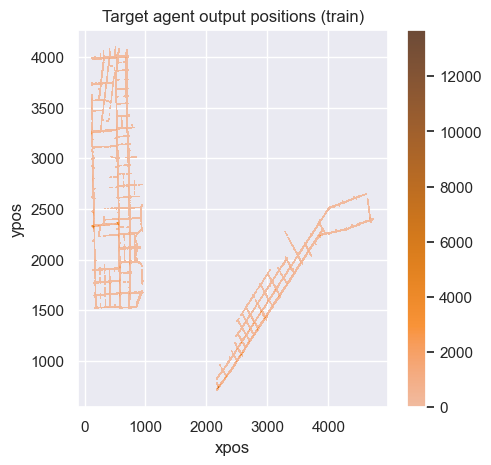

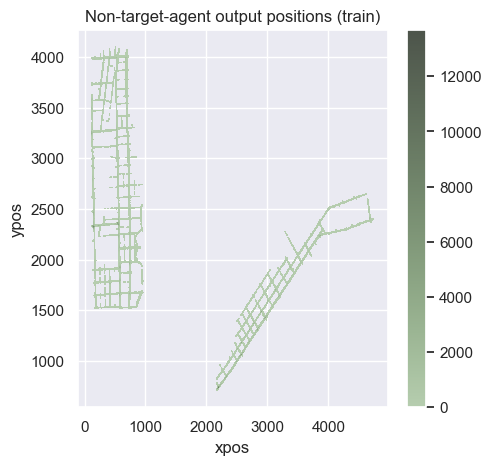

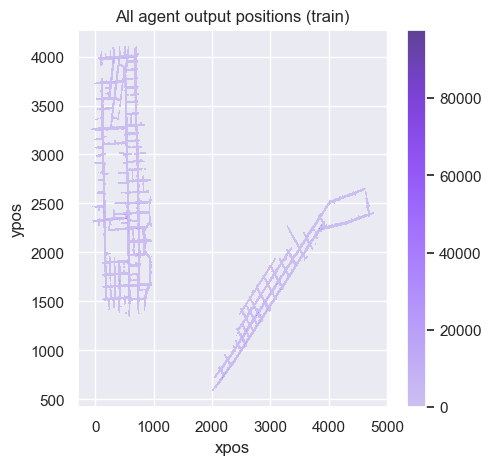

In [11]:
# Get all of the output x and y positions for target agents
xpos_t = df[df[WAS_TARGET] == 1][P_OUT_X].to_numpy()
xpos_t = xpos_t.reshape(xpos_t.shape[0] * xpos_t.shape[1])

ypos_t = df[df[WAS_TARGET] == 1][P_OUT_Y].to_numpy()
ypos_t = ypos_t.reshape(ypos_t.shape[0] * ypos_t.shape[1])

# Get all of the output x and y positions for non-target agents
xpos_n = df[df[WAS_TARGET] == 0][P_OUT_X].to_numpy()
xpos_n = xpos_n.reshape(xpos_n.shape[0] * xpos_n.shape[1])

ypos_n = df[df[WAS_TARGET] == 0][P_OUT_Y].to_numpy()
ypos_n = ypos_n.reshape(ypos_n.shape[0] * ypos_n.shape[1])

# Get all of the output x and y positions for all agents
xpos = df[P_OUT_X].to_numpy()
xpos = xpos.reshape(xpos.shape[0] * xpos.shape[1])

ypos = df[P_OUT_Y].to_numpy()
ypos = ypos.reshape(ypos.shape[0] * ypos.shape[1])

# Plot the positions
title = 'Target agent output positions (train)'
palette = 'Reds'
bins = 1000
x_label, y_label = 'xpos', 'ypos'
fname = '../milestone_images/outPosTargTrain'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent output positions (train)'
palette = 'Greens'
fname = '../milestone_images/outPosNonTrain'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'All agent output positions (train)'
palette = 'plasma'
fname = '../milestone_images/outPosTrain'
plot_hist(xpos, ypos, bins, title, palette, x_label, y_label, fname)